<a href="https://colab.research.google.com/github/gustavo-plc/PyStatistics/blob/main/AEDI_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK DESTINADO A REGISTRAR AS TAREFAS DA DISCIPLINA DE AEDI - 1º/2025
### PROFESSOR: JOÃO GABRIEL DE MORAES SOUZA
### ALUNO: GUSTAVO PARREIRA LIMA CUNHA

# **TAREFA 3**

# QUESTÃO A - COMPARAÇÃO DE PREÇOS ENTRE CARACTERÍSTICAS

In [9]:
import kagglehub
import pandas as pd
import os

# Baixar dataset
path = kagglehub.dataset_download("prevek18/ames-housing-dataset")
print("Path to dataset files:", path)

# leitura do arquivo
csv_path = os.path.join(path, "AmesHousing.csv")
df = pd.read_csv(csv_path)

# Exibir as informações
print(df.info())
display(df)


Path to dataset files: /kaggle/input/ames-housing-dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bl

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


### Escolha das características da propriedade:

1. Lot Area: área total do terreno
2. Gr Liv Area: Ground Living Area: área habitável acima do nível do solo
3. Year Remod/Add: Ano em que o imóvel foi reformado ou teve alguma ampliação adicionada.

Essas características supostamente impactam diretamente no valor da casa, pois indicam a área construída, tamanho do terreno e o quão nova é a casa ou parte dela.

Para utilizar a ANOVA, é necessário analisar a distribuição dos resíduos.

In [15]:
#filtrando dados

dados_filtrados = df[['Lot Area', 'Gr Liv Area', 'Year Remod/Add', 'SalePrice']]
display(dados_filtrados)


,Lot Area,Gr Liv Area,Year Remod/Add,SalePrice
0,31770,1656,1960,215000
1,11622,896,1961,105000
2,14267,1329,1958,172000
3,11160,2110,1968,244000
4,13830,1629,1998,189900
...,...,...,...,...
2925,7937,1003,1984,142500
2926,8885,902,1983,131000
2927,10441,970,1992,132000
2928,10010,1389,1975,170000


Serão comparados os preços de venda médio para diferentes níveis das 3 características. Como elas são contínuas, serão criadas categorias para cada uma delas.

Para criação das categorias, será usada a função qcut, que divide o conjunto de dados de acordo com o número de observações, ou seja, percentis.

qcut() não divide pelos valores, mas pela posição no ranking (percentis).

In [18]:
df['LotArea_cat'] = pd.qcut(df['Lot Area'], q=4, labels=['Pequeno', 'Médio', 'Grande', 'Muito grande'])

df['GrLivArea_cat'] = pd.qcut(df['Gr Liv Area'], q=4, labels=['Pequeno', 'Médio', 'Grande', 'Muito grande'])

df['YearRemod_Add_cat'] = pd.qcut(df['Year Remod/Add'], q=4, labels=['Antiga', 'Defasada', 'Padrão', 'Moderna'])

from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lot = ols('SalePrice ~ C(LotArea_cat)', data=df).fit()
anova_lot = sm.stats.anova_lm(modelo_lot, typ=2)
print(anova_lot)

modelo_gr = ols('SalePrice ~ C(GrLivArea_cat)', data=df).fit()
anova_gr = sm.stats.anova_lm(modelo_gr, typ=2)
print(anova_gr)

modelo_yr = ols('SalePrice ~ C(YearRemod_Add_cat)', data=df).fit()
anova_yr = sm.stats.anova_lm(modelo_yr, typ=2)
print(anova_yr)

                      sum_sq      df           F         PR(>F)
C(LotArea_cat)  3.491763e+12     3.0  224.043355  7.769813e-131
Residual        1.520077e+13  2926.0         NaN            NaN
                        sum_sq      df           F  PR(>F)
C(GrLivArea_cat)  7.845476e+12     3.0  705.440377     0.0
Residual          1.084706e+13  2926.0         NaN     NaN
                            sum_sq      df           F         PR(>F)
C(YearRemod_Add_cat)  5.222605e+12     3.0  378.159349  1.477807e-207
Residual              1.346993e+13  2926.0         NaN            NaN


### É necessário aplicar ANOVA, mesmo sem confirmar os requisitos, para avaliar posteriormente os resíduos.

### Verificação dos resíduos

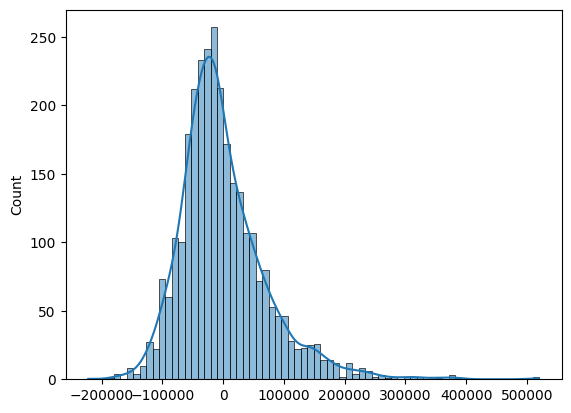

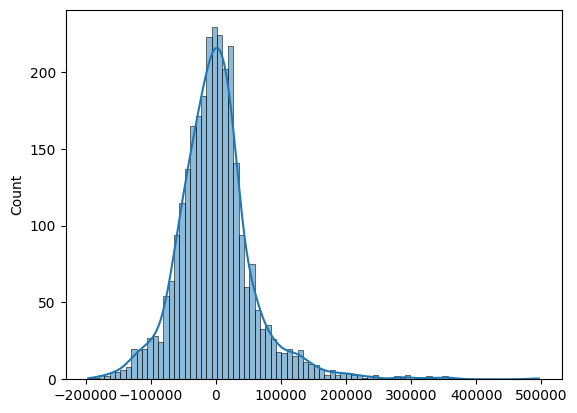

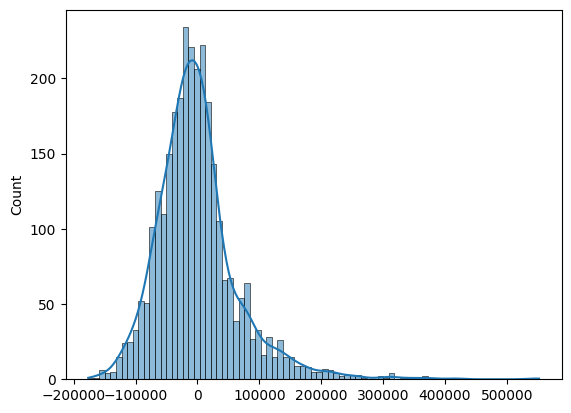

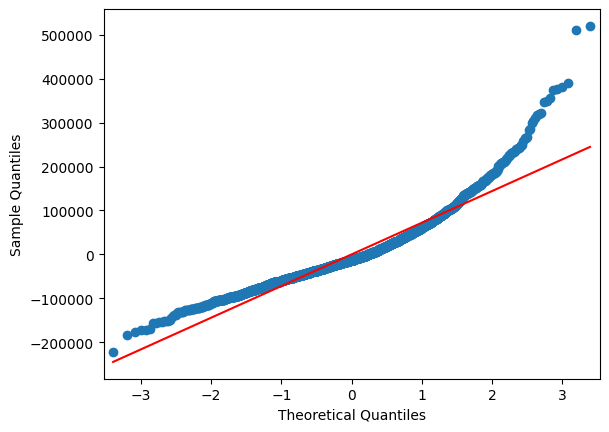

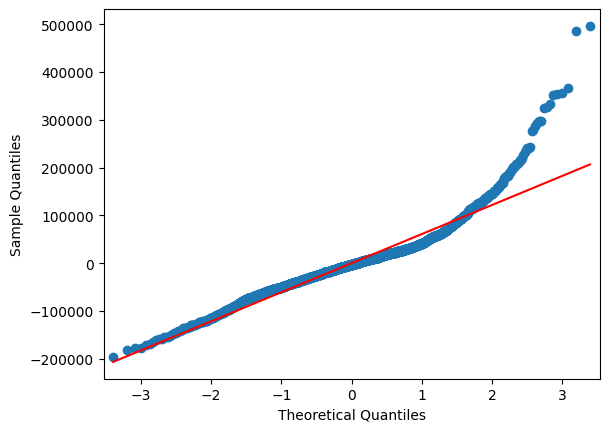

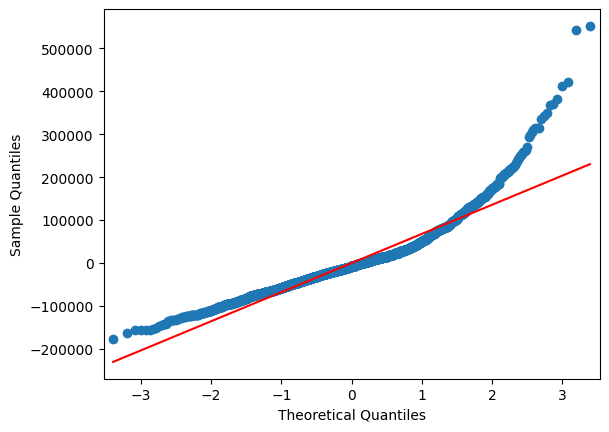





Estatística de Shapiro-Wilk: 0.9189826745718804
Valor-p: 4.664381685064501e-37

Estatística de Shapiro-Wilk: 0.9153699669493505
Valor-p: 1.1055244200720357e-37

Estatística de Shapiro-Wilk: 0.9022796008269076
Valor-p: 8.784409182961244e-40



In [28]:
residuos_lot = modelo_lot.resid

residuos_gr = modelo_gr.resid

residuos_yr = modelo_yr.resid

#HISTOGRAMA

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuos_lot, kde=True)
plt.show()
print()
sns.histplot(residuos_gr, kde=True)
plt.show()
print()
sns.histplot(residuos_yr, kde=True)
plt.show()
print()

# QQ-plot

sm.qqplot(residuos_lot, line='s')
plt.show()
print()

sm.qqplot(residuos_gr, line='s')
plt.show()
print()

sm.qqplot(residuos_yr, line='s')
plt.show()
print()

from scipy.stats import shapiro

est_lot, p_valor_lot = shapiro(residuos_lot)
print()

est_gr, p_valor_gr = shapiro(residuos_gr)
print()

est_yr, p_valor_yr = shapiro(residuos_yr)
print()


# Exibindo o resultado
print(f'Estatística de Shapiro-Wilk: {est_lot}')
print(f'Valor-p: {p_valor_lot}')
print()

print(f'Estatística de Shapiro-Wilk: {est_gr}')
print(f'Valor-p: {p_valor_gr}')
print()

print(f'Estatística de Shapiro-Wilk: {est_yr}')
print(f'Valor-p: {p_valor_yr}')
print()

Apesar de, aparentemente, o histograma dos resíduos indicar uma distribuição normal, o QQ-Plot evidencia a não normalidade dos erros. Serão a seguir executados mais testes para confirmar esse achado.

### Para confirmar a não normalidade dos resíduos, será realizado um teste de  Kolmogorov-Smirnov (K-S)

In [30]:
from scipy.stats import kstest
from scipy.stats import zscore

# Padroniza os resíduos (média = 0, desvio padrão = 1)
residuos_padronizados_lot = zscore(residuos_lot)

# Aplica o teste K-S contra uma normal padrão
estatistica_lot_ks, p_valor_lot_ks = kstest(residuos_padronizados_lot, 'norm')

# Mostra os resultados
print(f'Estatística de Kolmogorov-Smirnov: {estatistica_lot_ks}')
print(f'Valor-p: {p_valor_lot_ks}')
print()


# Padroniza os resíduos (média = 0, desvio padrão = 1)
residuos_padronizados_gr = zscore(residuos_gr)

# Aplica o teste K-S contra uma normal padrão
estatistica_gr_ks, p_valor_gr_ks = kstest(residuos_padronizados_gr, 'norm')

# Mostra os resultados
print(f'Estatística de Kolmogorov-Smirnov: {estatistica_gr_ks}')
print(f'Valor-p: {p_valor_gr_ks}')
print()


# Padroniza os resíduos (média = 0, desvio padrão = 1)
residuos_padronizados_yr = zscore(residuos_yr)

# Aplica o teste K-S contra uma normal padrão
estatistica_yr_ks, p_valor_yr_ks = kstest(residuos_padronizados_yr, 'norm')

# Mostra os resultados
print(f'Estatística de Kolmogorov-Smirnov: {estatistica_yr_ks}')
print(f'Valor-p: {p_valor_yr_ks}')
print()

Estatística de Kolmogorov-Smirnov: 0.10008942199161042
Valor-p: 5.268047736762113e-26

Estatística de Kolmogorov-Smirnov: 0.10186218515306078
Valor-p: 6.396008018140674e-27

Estatística de Kolmogorov-Smirnov: 0.11007159197385363
Valor-p: 2.25763795648472e-31



### O teste K-S confirmou a não normalidade dos resíduos, portanto será aplicado o teste de Kruskal-Wallis, que não assume normalidade dos resíduos.

In [32]:
from scipy.stats import kruskal

# Lote
grupos_lot = [df[df['LotArea_cat'] == cat]['SalePrice'] for cat in df['LotArea_cat'].unique()]
estat_lot, pval_lot = kruskal(*grupos_lot)
print(f"LotArea_cat — Estatística: {estat_lot:.2f} | p-valor: {pval_lot:.4e}")
print()

# Área construída
grupos_gr = [df[df['GrLivArea_cat'] == cat]['SalePrice'] for cat in df['GrLivArea_cat'].unique()]
estat_gr, pval_gr = kruskal(*grupos_gr)
print(f"GrLivArea_cat — Estatística: {estat_gr:.2f} | p-valor: {pval_gr:.4e}")
print()

# Ano da reforma
grupos_yr = [df[df['YearRemod_Add_cat'] == cat]['SalePrice'] for cat in df['YearRemod_Add_cat'].unique()]
estat_yr, pval_yr = kruskal(*grupos_yr)
print(f"YearRemod_Add_cat — Estatística: {estat_yr:.2f} | p-valor: {pval_yr:.4e}")
print()


LotArea_cat — Estatística: 530.55 | p-valor: 1.1402e-114

GrLivArea_cat — Estatística: 1427.97 | p-valor: 2.5113e-309

YearRemod_Add_cat — Estatística: 1003.27 | p-valor: 3.5069e-217



## Interpretação dos resultados.

A aplicação do teste não paramétrico de Kruskal-Wallis, que não pressupõe normalidade dos resíduos, confirmou a suposição feita no início, de que o preço das casas era influenciado diretamente pela área do lote, área construída e tempo desde a última reforma.